### Task is to predict the cost on the basis of male and felmale.

We have the medical insurance dataset. 

Complete Lifecycle:

1. Exploratory data analysis.
2. Feature Engineering. 
3. Model building and prediction.
4. Model evaluation.


In [1]:
## We shall import the libararirs for pandas and nummpy and load the dataframe.

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
## Data frame has 1338 records and 7 features. 

data.shape

(1338, 7)

In [5]:
## There are no null values. 

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# We have 3 categorical features-[sex,smoker,region] and 3 numerical features - [age,bmi,children,charges].
## We then create a list for both feature.

numerical_feature =[feature for feature in data.columns if data[feature].dtype!='O']

categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']

In [20]:
print(numerical_feature)
print(categorical_feature)

['age', 'bmi', 'children', 'charges']
['sex', 'smoker', 'region']


In [21]:
## Now lets check unique values in each feature

for feature in data.columns:
    print(feature,':',data[feature].unique().sum(),'Counts')

age : 1927 Counts
sex : femalemale Counts
bmi : 17038.98 Counts
children : 15 Counts
smoker : yesno Counts
region : southwestsoutheastnorthwestnortheast Counts
charges : 17754185.427659 Counts


In [22]:
## From above we can know that we have children as discrete numerical feature. Rest all are continuous. 

discrete_feature = ['children']
continous_feature = [feature for feature in numerical_feature if 'children' not in feature]

In [23]:
continous_feature

['age', 'bmi', 'charges']

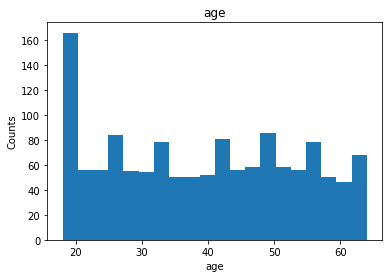

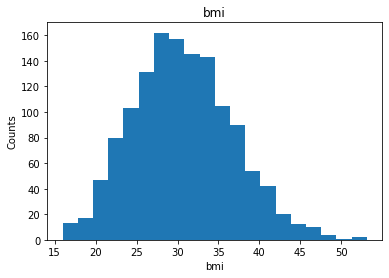

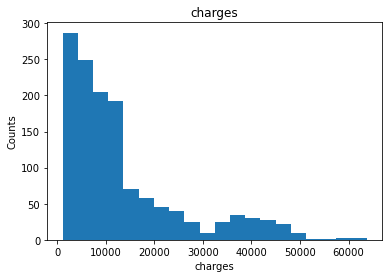

In [26]:
## Now lets check the distribution of continous features. Lets import matplotlib 

import matplotlib.pyplot as plt

for feature in continous_feature:
    dataset = data.copy()
    dataset[feature].plot.hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.title(feature)
    plt.show()
    
    

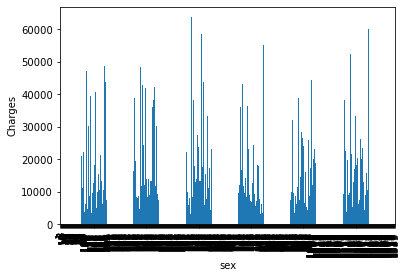

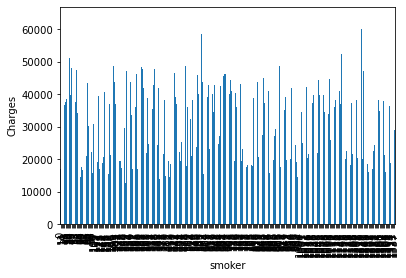

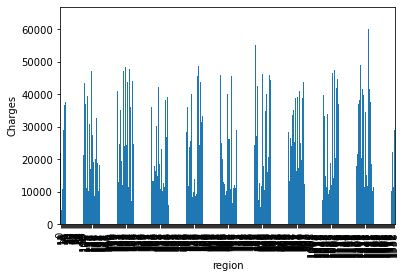

In [27]:
## Now lets check the relationship between categorical feature and output feature.

for feature in categorical_feature:
    dataset=data.copy()
    dataset.groupby([feature])['charges'].mean().plot.count()
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()